In [1]:

!pip install pandas scikit-learn seaborn matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
from google.colab import files

df = pd.read_csv("/content/book_genres.csv")
df.head()


,author_popularity,book_length,num_keywords,genre
0,41.052297,776,5,mystery
1,48.950098,674,5,mystery
2,2.323401,633,19,fantasy
3,41.564184,169,12,mystery
4,65.129649,992,18,fantasy


In [5]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author_popularity  100 non-null    float64
 1   book_length        100 non-null    int64  
 2   num_keywords       100 non-null    int64  
 3   genre              100 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


,0
author_popularity,0
book_length,0
num_keywords,0
genre,0


In [15]:
df.dropna(inplace=True)
df.rename(columns={"AuthorName": "author", "PageCount": "length", "Tags": "keywords", "Genre": "genre"}, inplace=True)

df.head()


,author_popularity,book_length,num_keywords,genre,genre_encoded
0,41.052297,776,5,mystery,2
1,48.950098,674,5,mystery,2
2,2.323401,633,19,fantasy,0
3,41.564184,169,12,mystery,2
4,65.129649,992,18,fantasy,0


In [24]:
print(df.columns)

Index(['author_popularity', 'book_length', 'num_keywords', 'genre',
       'genre_encoded', 'text_data'],
      dtype='object')


In [10]:
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])
df[['genre', 'genre_encoded']].drop_duplicates()


,genre,genre_encoded
0,mystery,2
2,fantasy,0
5,non-fiction,3
8,fiction,1


In [25]:
df['text_data'] = df['author_popularity'].astype(str) + ' ' + df['book_length'].astype(str) + ' ' + df['num_keywords'].astype(str)
df[['text_data']].head()

,text_data
0,41.05229698399772 776 5
1,48.95009820285936 674 5
2,2.323400642680168 633 19
3,41.564184407850966 169 12
4,65.12964906208387 992 18


In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_data'])

y = df['genre_encoded']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

Classification Report:
               precision    recall  f1-score   support

     fantasy       0.00      0.00      0.00         4
     fiction       0.00      0.00      0.00         1
     mystery       0.40      0.40      0.40        10
 non-fiction       0.20      0.20      0.20         5

    accuracy                           0.25        20
   macro avg       0.15      0.15      0.15        20
weighted avg       0.25      0.25      0.25        20



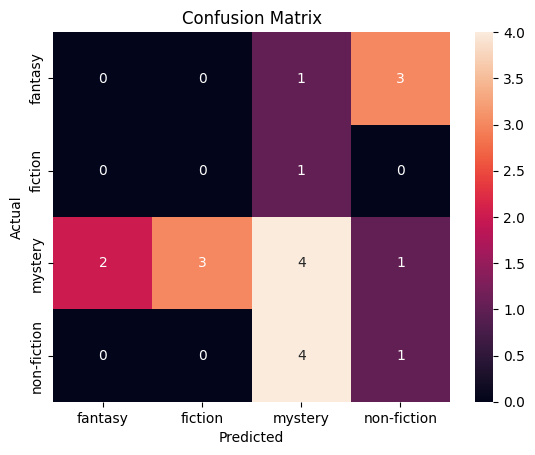

In [23]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
